In [67]:
import pandas as pd
data = pd.read_csv("credit_card.csv")

Inspect the dataset

In [68]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,...,35.8072,-78.0892,6629,Call centre manager,1962-08-13,abe0676c18f34fa305b113fa762e29b5,1325377087,36.749870,-78.677870,0
2,2019-01-01 00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,...,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,289789e617eece42a9cafe36680b1b69,1325378238,35.034285,-92.343010,0
3,2019-01-01 00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,...,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,9d660a18154a3ba5fe869f373c6f819c,1325379419,42.868965,-108.503350,0
4,2019-01-01 01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,...,26.7383,-80.2760,26551,Paramedic,1977-01-04,3c6158c556727d527f8b51cc03b30236,1325380612,27.346033,-80.475563,0


Check for nulls

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59073 entries, 0 to 59072
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  59073 non-null  object 
 1   cc_num                 59073 non-null  int64  
 2   merchant               59073 non-null  object 
 3   category               59073 non-null  object 
 4   amt                    59073 non-null  float64
 5   first                  59073 non-null  object 
 6   last                   59073 non-null  object 
 7   gender                 59073 non-null  object 
 8   street                 59073 non-null  object 
 9   city                   59073 non-null  object 
 10  state                  59073 non-null  object 
 11  zip                    59073 non-null  int64  
 12  lat                    59073 non-null  float64
 13  long                   59073 non-null  float64
 14  city_pop               59073 non-null  int64  
 15  jo

Calculating fraudulent transaction mean and median

In [70]:
fraud_amt_avg = data[data["is_fraud"] == 1]["amt"].mean()
fraud_amt_median = data[data["is_fraud"] == 1]["amt"].median()
print(f"fraudulent transaction mean amount is {fraud_amt_avg} and median is {fraud_amt_median}")

fraudulent transaction mean amount is 531.3200919264589 and median is 396.505


Calculating total fraud and non-fraud for credit number 344709867813900

In [71]:
cc_344709867813900 = data[data["cc_num"] == 344709867813900].groupby("is_fraud")["amt"].sum()
cc_344709867813900

is_fraud
0    11667.49
1     6450.28
Name: amt, dtype: float64

Drop columns unix_time and trans_num

In [72]:
data = data.drop(["unix_time", "trans_num"], axis=1)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,NC,27807,35.8072,-78.0892,6629,Call centre manager,1962-08-13,36.749870,-78.677870,0
2,2019-01-01 00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,AR,72047,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,35.034285,-92.343010,0
3,2019-01-01 00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,42.868965,-108.503350,0
4,2019-01-01 01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,FL,33470,26.7383,-80.2760,26551,Paramedic,1977-01-04,27.346033,-80.475563,0


Adding an additional column that categorises time of day when the transaction took place

In [73]:
from datetime import time

In [74]:
#define function for time of day
def timeofday(t):
    if time(0, 0, 0) <= t <= time(5, 59, 59):
        return 1
    elif time(6, 0, 0) <= t <= time(11, 59, 59):
        return 2
    elif time(12, 0, 0) <= t <= time(17, 59, 59):
        return 3
    else:
        return 4
#apply above function to time extracted from "trans_date_trans_time" in datetime format
data["time_of_day"] = pd.to_datetime(data["trans_date_trans_time"]).dt.time.apply(timeofday)
data.sample(5)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,time_of_day
33238,2019-12-12 12:58:14,38057513087029,fraud_Bauch-Blanda,entertainment,86.20,Marissa,Clark,F,2677 Byrd Village Suite 035,San Jose,...,95148,37.3304,-121.7913,973849,Geoscientist,1997-01-18,37.640572,-121.647726,0,3
19933,2019-08-05 17:33:25,3524574586339330,fraud_Bins-Tillman,entertainment,65.81,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,Vero Beach,...,32960,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,27.145913,-80.497298,0,3
1337,2019-01-21 01:40:05,676248282243,"fraud_Roob, Conn and Tremblay",shopping_pos,2.65,Amanda,Wheeler,F,329 Emily Cape,Cape Coral,...,33909,26.6939,-81.9452,156391,Higher education careers adviser,1968-02-09,27.194171,-82.767330,0,1
46550,2020-05-03 21:36:52,4998109455173950,"fraud_Gottlieb, Considine and Schultz",shopping_net,10.46,Mary,Pruitt,F,2819 Luke Greens Suite 563,Kansas City,...,64114,38.9621,-94.5959,545147,Counsellor,1987-11-18,39.182109,-94.952780,0,4
8461,2019-04-19 03:54:41,3517814635263522,fraud_Bauch-Raynor,grocery_pos,129.57,William,Cannon,M,43809 Kenneth Circles Suite 152,Union,...,24983,37.5802,-80.5248,2443,Chartered public finance accountant,1941-10-16,37.215905,-80.469322,0,1


In [75]:
#data["trans_date_trans_time"] = data["trans_date_trans_time"].apply(lambda x: x.split(" ")[1])

Now to remove trans_time from trans_date_trans_time

In [76]:
data["trans_date_trans_time"] = data["trans_date_trans_time"].str.split(" ").str.get(0)
data.sample(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,time_of_day
22659,2019-08-30,3576144910346950,fraud_Fahey Inc,kids_pets,45.70,Thomas,Payne,M,9455 Kathleen Brook Apt. 651,Huslia,...,99746,65.6899,-156.2920,277,"Engineer, civil (consulting)",1965-11-06,65.631227,-155.950080,0,3
55604,2019-10-17,180065479077096,fraud_Deckow-Dare,food_dining,111.46,Krystal,Gamble,F,47152 Clayton Burg,Manchester,...,21102,39.6747,-76.8941,11751,Clinical research associate,1964-02-15,39.939689,-77.250320,1,4
8731,2019-04-21,676102124465,fraud_Haag-Blanda,food_dining,86.56,Natasha,Mclaughlin,F,8699 Lindsay Ford Apt. 486,Napa,...,94558,38.4549,-122.2564,94014,Airline pilot,1985-08-21,37.509383,-122.664874,0,4
6543,2019-03-28,5410056176712193,fraud_Schoen-Quigley,kids_pets,44.12,Jeffrey,Krause,M,4742 Alexandria Mountain,New Franken,...,54229,44.5592,-87.8235,4306,Art therapist,1989-10-19,44.886676,-87.172154,0,4
28786,2019-11-04,2706977570537524,fraud_Beer-Jast,kids_pets,54.80,David,Serrano,M,4739 Martin Common,Zaleski,...,45698,39.2830,-82.3977,341,Accounting technician,1978-12-18,40.142088,-82.728224,0,4


In [77]:
data["time_of_day"].value_counts()

time_of_day
4    19819
3    16133
1    12714
2    10407
Name: count, dtype: int64

In [81]:
import matplotlib as plt
import seaborn as sns

<Axes: >

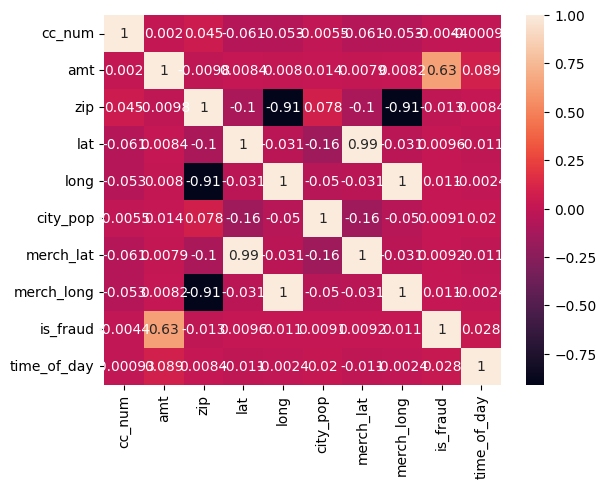

In [85]:
sns.heatmap(data.corr(method="pearson", numeric_only=True), annot=True)